# 연습문제 (2)
## #01. 패키지


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')



## #02. 데이터 가져오기

In [2]:
origin = pd.read_excel('iris.xlsx')

origin.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 데이터 확인

In [3]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
origin['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
origin.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
origin.isnull().sum()


Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [10]:
origin.duplicated().sum()

1

In [8]:
df= origin.copy()


In [12]:
### 데이터의 왜곡, 모델 과적합 이슈로 안하는게 중복된 데이터는 제거하는게 가장 좋음
df.loc[df.duplicated(),:]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
142,5.8,2.7,5.1,1.9,virginica


In [13]:
# 중복데이터 모두 출력

df.loc[(df['Sepal.Length']==5.8)&(df['Sepal.Width']==2.7)]


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
67,5.8,2.7,4.1,1.0,versicolor
82,5.8,2.7,3.9,1.2,versicolor
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [14]:
df = df.drop_duplicates()

df.loc[(df['Sepal.Length']==5.8)&(df['Sepal.Width']==2.7)]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
67,5.8,2.7,4.1,1.0,versicolor
82,5.8,2.7,3.9,1.2,versicolor
101,5.8,2.7,5.1,1.9,virginica


In [17]:
df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

In [18]:
df['Species'] = origin['Species'].map({'setosa':0,'versicolor':1,'virginica':2})
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


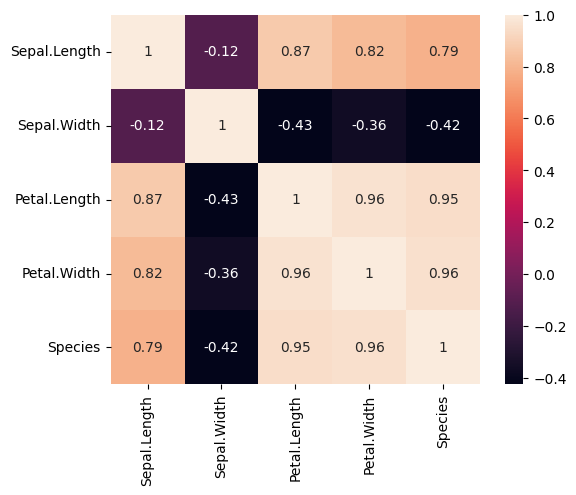

In [19]:
sb.heatmap(data=df.corr(),square=True,annot=True,cbar=True)
plt.show()

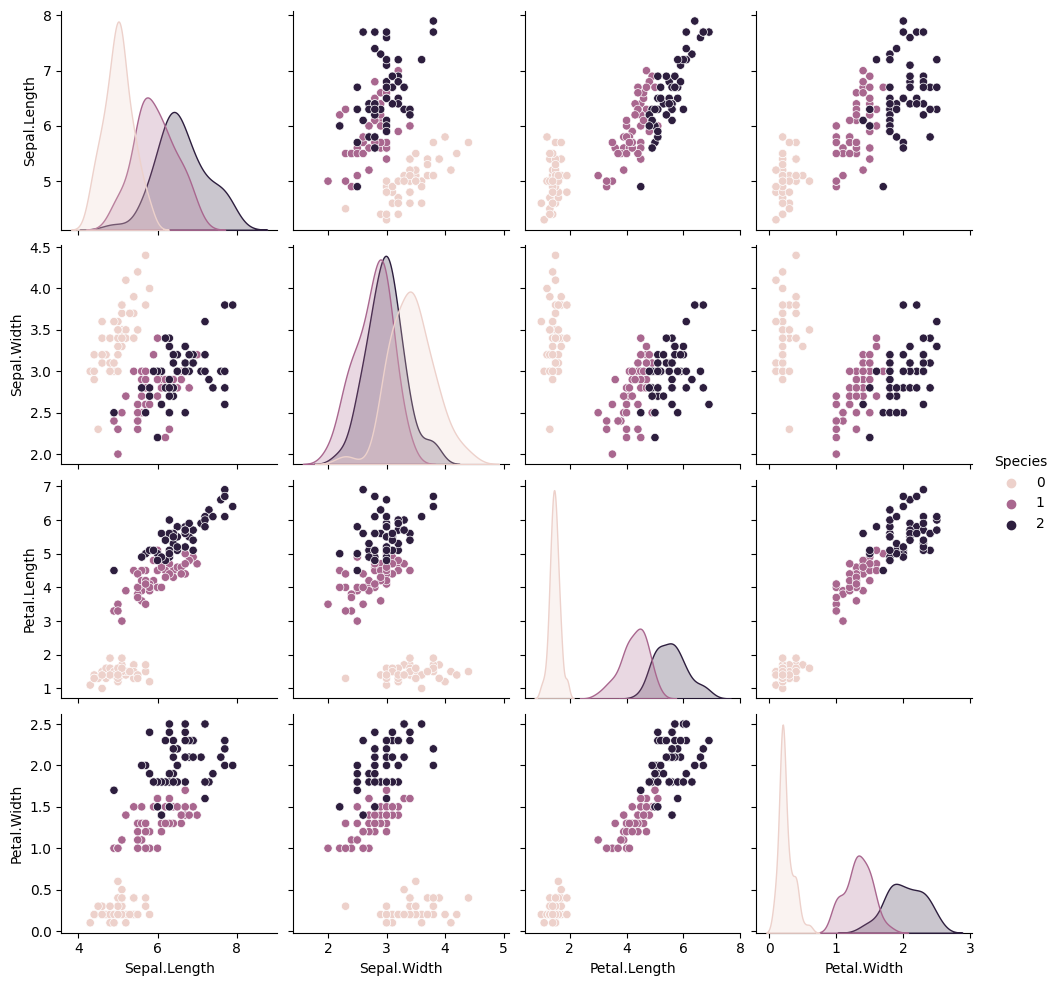

In [22]:
sb.pairplot(data=df,hue='Species')

plt.show()
plt.close()

In [23]:
### sepad_width를 보면 너비에따라 품종차이가 그렇게 차이나는거 같지않음 그래서 sepalwidth는 유의하지 않은 변수라고 판단하고 제거 
df = df.drop('Sepal.Width',axis=1)
df.head()

,Sepal.Length,Petal.Length,Petal.Width,Species
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0


In [24]:
from sklearn.model_selection import train_test_split
x_data = df.loc[:,'Sepal.Length':'Petal.Width']
y_data = df[['Species']]

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,shuffle=2,random_state=31)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(104, 3) (104, 1)
(45, 3) (45, 1)


In [26]:
## 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_test = scaler.fit_transform(x_test)
x_scaled_train = pd.DataFrame(x_scaled_train,columns=x_train.columns)
x_scaled_test = pd.DataFrame(x_scaled_test,columns=x_test.columns)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(104, 3) (104, 1)
(45, 3) (45, 1)


In [30]:
model = KNeighborsClassifier(n_neighbors=4,
                             weights='uniform',metric='minkowski')
model.fit(x_train,y_train)

# 정확도 출력
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.9615384615384616
0.9555555555555556


In [31]:
# metrics가 uniform이면 이웃한 관측치와의 거리에 가중치를 주지않는 옵션


### 이웃 k옵션 1~30의 모델 생성


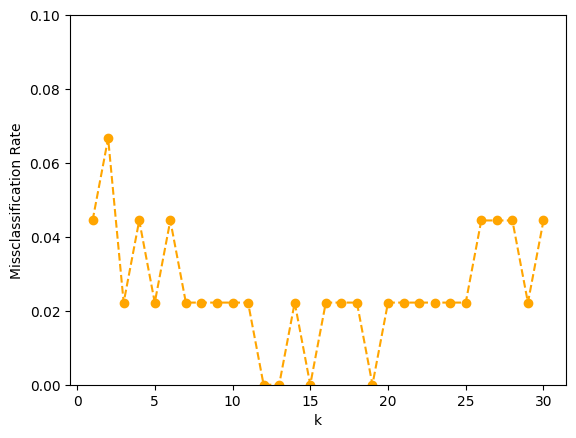

In [40]:
# k 수 범위 지정
k_num = range(1,31)

accuracies = []

for k in k_num :
    k_num_model_1 = KNeighborsClassifier(n_neighbors=k,weights='uniform')
    k_num_model_1.fit(x_train,y_train)
    accuracies.append(1-k_num_model_1.score(x_test,y_test))


# 그래프 옵션 설정
plt.plot(list(k_num),accuracies,'o--',color='orange')
plt.xlabel('k')
plt.ylabel('Missclassification Rate')
plt.ylim(0.0,0.1)
plt.show()

In [37]:
accuracies

[0.0444444444444444,
 0.06666666666666665,
 0.022222222222222254,
 0.0444444444444444,
 0.022222222222222254,
 0.0444444444444444,
 0.022222222222222254,
 0.022222222222222254,
 0.022222222222222254,
 0.022222222222222254,
 0.022222222222222254,
 0.0,
 0.0,
 0.022222222222222254,
 0.0,
 0.022222222222222254,
 0.022222222222222254,
 0.022222222222222254,
 0.0,
 0.022222222222222254,
 0.022222222222222254,
 0.022222222222222254,
 0.022222222222222254,
 0.022222222222222254,
 0.022222222222222254,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.022222222222222254,
 0.0444444444444444]

Text(0, 0.5, 'Missclassification Rate')

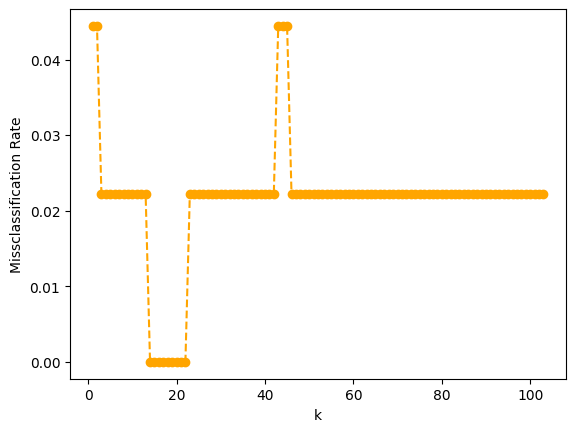

In [44]:
#  이웃 k 수 1~200 까지 엘보우차트(거리가중치 비교)
# k 수 범위 지정


k_num = range(1,104)

accuracies=[]
for k in k_num :
    k_num_model_2 = KNeighborsClassifier(n_neighbors=k,weights = 'distance')
    k_num_model_2.fit(x_train,y_train)
    accuracies.append(1-k_num_model_2.score(x_test,y_test))


# 그래프 옵션 설정
plt.plot(list(k_num),accuracies,'o--',color='orange')
plt.xlabel('k')
plt.ylabel('Missclassification Rate')


## #05. 분류 성능 평가